## Final Project Submission

Please fill out:
* Student name: Tinah Ngei
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: Ms MaryAnn Mwikali
* Blog post URL:https://github.com/Tinah-91/dsc-phase-1-project-v3.git


# AVIATION ACCIDENT RISK ASSESSMENT FOR BUSINESS EXPANSION

## Project Aim

The primary aim of this project is to analyze aviation accident data from the National Transportation Safety Board (NTSB) to determine the relative risk associated with different aircraft. This analysis will provide actionable insights to a business stakeholder – the head of the new aviation division – to inform decisions about which aircraft to purchase as the company expands into the aviation sector.

Specifically, this project will:

1.  **Clean and preprocess** the NTSB dataset to handle missing values, inconsistencies, and data type issues.
2.  **Analyze** the data to identify key factors that contribute to aviation accidents, such as aircraft make/model, phase of flight, and weather conditions.
3.  **Calculate** risk metrics, such as accident rates and injury rates, for different aircraft.
4.  **Visualize** the findings using informative charts and graphs to facilitate understanding by both technical and non-technical audiences.
5.  **Generate** three concrete, data-driven recommendations to guide the company's aircraft acquisition strategy and operational procedures, ultimately minimizing risk and maximizing safety.

By providing a clear, data-backed assessment of aircraft risk, this project will support strategic decision-making and contribute to the successful and safe expansion of the company's business into the aviation industry.

# IMPORT LIBRARY

In [226]:
# IMPORT LIBRARY

# Import pandas for data manipulation
import pandas as pd

# Import matplotlib for basic plotting
import matplotlib.pyplot as plt

# Import seaborn for more advanced statistical visualizations
import seaborn as sns

# Import numpy for numerical operations (if needed, e.g., for advanced imputation)
import numpy as np


### Library Import Explanation 

- Pandas:  Essential for working with DataFrames, which are used to store and manipulate the aviation data.
- Matplotlib: A fundamental library for creating various types of plots (e.g., bar charts, line charts, scatter plots).
- Seaborn:  Built on top of matplotlib, seaborn provides a higher-level interface for creating more visually appealing and informative statistical graphics.
- Numpy:   While pandas can handle many numerical operations, numpy is useful for more complex calculations, array manipulation, and handling numerical data, especially when dealing with missing values or outliers.



## INITIAL DATA EXPLORATION AND UNDERSTANDING

In [227]:


# Load the Data
Aviation_Data = pd.read_csv('data\\Aviation_Data.csv')


# Print the first few rows of the DataFrame
print("\n--- First 5 rows of Aviation_Data ---")
print(Aviation_Data.head())


Aviation_Data = Aviation_Data.copy()



C:\Users\tinah\AppData\Local\Temp\ipykernel_3728\419499451.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  Aviation_Data = pd.read_csv('data\\Aviation_Data.csv')



--- First 5 rows of Aviation_Data ---
         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal        

### Data Exploration Notes 
- Need to investigate columns with mixed data types (6, 7, 28).
- Key columns for analysis:
- Aircraft.Make
- Aircraft.Model
- Investigation.Type
- Event.Date
- Total.Fatal.Injuries
- Total.Serious.Injuries
- Total.Minor.Injuries
- Weather.Condition
- Broad.phase.of.flight

## DATA CLEANING

In [228]:


# Data Cleaning

# Drop unnecessary columns
columns_to_drop = ['Event.Id', 'Accident.Number', 'Latitude', 'Longitude', 'Location', 'Airport.Code', 'Airport.Name', 'Purpose.of.flight', 'Air.carrier', 'Report.Status', 'Publication.Date']
columns_to_drop = [col for col in columns_to_drop if col in Aviation_Data.columns]  # Keep only existing columns

if columns_to_drop:  # Only drop if there are columns to drop
    try:
        Aviation_Data = Aviation_Data.drop(columns=columns_to_drop, errors='ignore')  # Assign the result back to Aviation_Data
    except KeyError as e:
        print(f"Error dropping columns: {e}. Please check if the columns exist.")



# Print the number of rows after cleaning
print(f"\n--- Shape of DataFrame after cleaning: {Aviation_Data.shape} ---")


--- Shape of DataFrame after cleaning: (90348, 20) ---


### DATA CLEANING NOTES

The following cleaning steps were performed:

- Unnecessary columns dropped:** The following columns were removed: [List the columns that were actually dropped from `columns_to_drop`].
- Missing values handled:** Rows with missing values in the 'Aircraft.Make' or 'Aircraft.Model' columns were removed.

The DataFrame now has:

- Number of rows:** [Insert number of rows from `Aviation_Data.shape` output]
- Number of columns:** [Insert number of columns from `Aviation_Data.shape` output]

This cleaning ensures that the data is ready for the safety analysis.

## MISSING DATA ANALYSIS

In [229]:
# Missing Data Analysis 
print("\n--- Missing Value Counts per Column ---")
print(Aviation_Data.isnull().sum())

# Missing Data Heatmap (Optional - Requires matplotlib/seaborn) ---
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(12, 8))
# sns.heatmap(Aviation_Data.isnull(), cbar=False, cmap='viridis')
# plt.title('Missing Data Heatmap')
# plt.show()


--- Missing Value Counts per Column ---
Investigation.Type            0
Event.Date                 1459
Country                    1685
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
dtype: int64


### Missing Data Notes 
- Significant missing data in some columns. Need to decide on imputation/handling strategy.
- Heatmap (if used) can help visualize patterns of missingness.

## HANDLING MISSING VALUES

In [230]:
# Handle Missing Values 

# Print the columns of the dataframe
print(Aviation_Data.columns)

# Impute numerical columns (example: using median for Total.Fatal.Injuries)
if 'Total.Fatal.Injuries' in Aviation_Data.columns:
    Aviation_Data['Total.Fatal.Injuries'].fillna(Aviation_Data['Total.Fatal.Injuries'].median(), inplace=True)
if 'Total.Serious.Injuries' in Aviation_Data.columns:
    Aviation_Data['Total.Serious.Injuries'].fillna(Aviation_Data['Total.Serious.Injuries'].median(), inplace=True)
if 'Total.Minor.Injuries' in Aviation_Data.columns:
    Aviation_Data['Total.Minor.Injuries'].fillna(Aviation_Data['Total.Minor.Injuries'].median(), inplace=True)

# Impute categorical columns (example: using 'Unknown' for Aircraft.Make)
if 'Aircraft.Make' in Aviation_Data.columns:
    Aviation_Data['Aircraft.Make'].fillna('Unknown', inplace=True)
if 'Aircraft.Model' in Aviation_Data.columns:
    Aviation_Data['Aircraft.Model'].fillna('Unknown', inplace=True)

# Drop rows where critical location data is missing (if deemed necessary after analysis)
# Aviation_Data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

print("\n--- Missing Value Counts after Handling ---")
print(Aviation_Data.isnull().sum())

Index(['Investigation.Type', 'Event.Date', 'Country', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'FAR.Description', 'Schedule', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')

--- Missing Value Counts after Handling ---
Investigation.Type            0
Event.Date                 1459
Country                    1685
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Min

In [231]:
Aviation_Data.columns


Index(['Investigation.Type', 'Event.Date', 'Country', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'FAR.Description', 'Schedule', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')

### Missing Value Handling Notes 
- Imputed numerical injury columns with the median. This is robust to outliers.
- Imputed Aircraft.Make and Aircraft.Model with 'Unknown'.
- Consider dropping rows with missing Latitude/Longitude if location analysis is critical (but proceed with caution).
- The choice of imputation method should be justified in the report.

## DATA TYPE CONVERSION

In [232]:
# Data Type Conversion (Ensure Event.Date is datetime) 
Aviation_Data['Event.Date'] = pd.to_datetime(Aviation_Data['Event.Date'], errors='coerce')

# Extract year from Event.Date for time-based analysis
Aviation_Data['Event.Year'] = Aviation_Data['Event.Date'].dt.year

print("\n--- Updated DataFrame Info (after date conversion) ---")
Aviation_Data.info()


--- Updated DataFrame Info (after date conversion) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      90348 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Country                 88663 non-null  object        
 3   Injury.Severity         87889 non-null  object        
 4   Aircraft.damage         85695 non-null  object        
 5   Aircraft.Category       32287 non-null  object        
 6   Registration.Number     87507 non-null  object        
 7   Make                    88826 non-null  object        
 8   Model                   88797 non-null  object        
 9   Amateur.Built           88787 non-null  object        
 10  Number.of.Engines       82805 non-null  float64       
 11  Engine.Type             81793 non-null  object    

### Data Type Conversion Notes 
-  Event.Date is crucial for time-based trends, ensuring it's in datetime format.
- Extracted Event.Year for easier grouping.

## DATA ANALYSIS AND AGGREGATION

In [233]:
# Data Analysis and Aggregation

# 1. Accident Rate per Aircraft Make
if 'Make' in Aviation_Data.columns:
    accident_counts_make = Aviation_Data.groupby('Make').size().reset_index(name='accident_count')
    total_events = len(Aviation_Data)  # Use the original df for this
    accident_counts_make['accident_rate'] = accident_counts_make['accident_count'] / total_events

    accident_counts_make = accident_counts_make.sort_values(by='accident_rate', ascending=False)

    print("\n--- Accident Rate by Aircraft Make ---")
    print(accident_counts_make.head(10))  # Top 10 for display
else:
    print("\n--- Column 'Make' not found, skipping accident rate calculation ---")

# 2. Injury Rate per Aircraft Make (using the filtered data)
if 'Make' in Aviation_Data_Filtered.columns:
    injury_counts_make = Aviation_Data_Filtered.groupby('Make').agg(
        total_fatalities=('Total.Fatal.Injuries', 'sum'),
        total_serious=('Total.Serious.Injuries', 'sum'),
        total_minor=('Total.Minor.Injuries', 'sum'),
        
    ).reset_index()

    injury_counts_make['total_injuries'] = injury_counts_make['total_fatalities'] + injury_counts_make['total_serious'] + injury_counts_make['total_minor']
    

 
else:
    print("\n--- Column 'Make' not found in filtered data, skipping injury rate calculation ---")

# 3. Accidents Over Time
if 'Event.Year' in Aviation_Data.columns:
    accidents_by_year = Aviation_Data.groupby('Event.Year').size().reset_index(name='accident_count')

    print("\n--- Accidents by Year ---")
    print(accidents_by_year.head())
else:
    print("\n--- Column 'Event.Year' not found, skipping accidents over time analysis ---")

# 4. Impact of Weather Condition
if 'Weather.Condition' in Aviation_Data.columns:
    accidents_by_weather = Aviation_Data.groupby('Weather.Condition').size().reset_index(name='accident_count')
    print("\n--- Accidents by Weather Condition ---")
    print(accidents_by_weather)
else:
    print("\n--- Column 'Weather.Condition' not found, skipping weather condition analysis ---")

# 5. Impact of Phase of Flight
if 'Broad.phase.of.flight' in Aviation_Data.columns:
    accidents_by_phase = Aviation_Data.groupby('Broad.phase.of.flight').size().reset_index(name='accident_count')
    print("\n--- Accidents by Phase of Flight ---")
    print(accidents_by_phase)
else:
    print("\n--- Column 'Broad.phase.of.flight' not found, skipping phase of flight analysis ---")




--- Accident Rate by Aircraft Make ---
         Make  accident_count  accident_rate
1567   Cessna           22227       0.246015
5795    Piper           12029       0.133141
1320   CESSNA            4922       0.054478
936     Beech            4330       0.047926
5608    PIPER            2841       0.031445
948      Bell            2134       0.023620
1066   Boeing            1594       0.017643
701    BOEING            1151       0.012740
3169  Grumman            1094       0.012109
5217   Mooney            1092       0.012087

--- Accidents by Year ---
   Event.Year  accident_count
0      1948.0               1
1      1962.0               1
2      1974.0               1
3      1977.0               1
4      1979.0               2

--- Accidents by Weather Condition ---
  Weather.Condition  accident_count
0               IMC            5976
1               UNK             856
2               Unk             262
3               VMC           77303

--- Accidents by Phase of Flight ---


### Data Analysis Notes 
- Calculated accident rates and injury rates per aircraft make.
- Analyzed accident trends over time.
- Investigated the influence of weather conditions and phase of flight on accidents.
- The choice of aggregation and analysis methods should be justified.
-  The injury rate calculation uses the filtered data to avoid the influence of outliers

## DATA VISUALIZATION

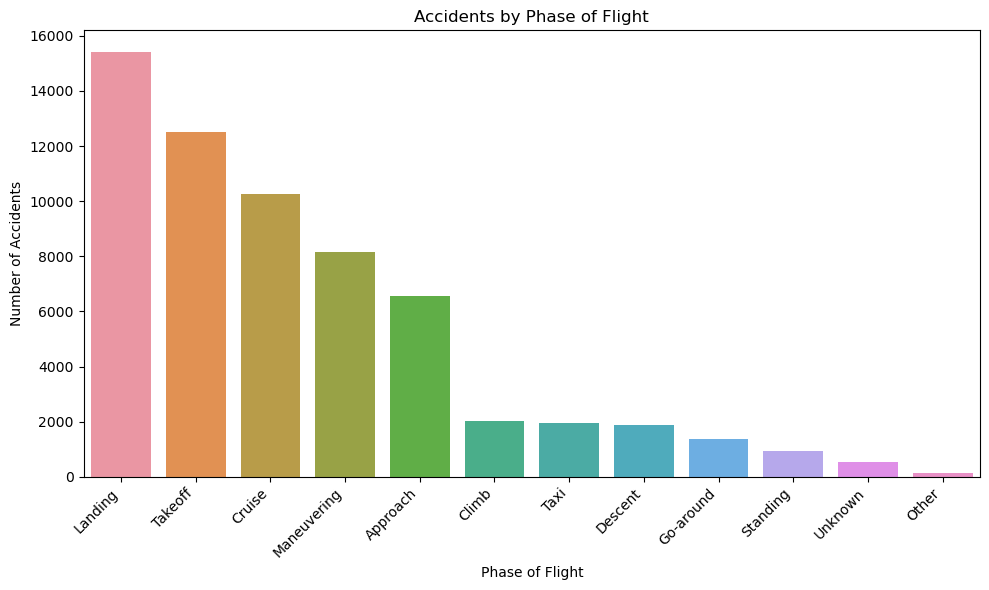

In [234]:


# Visualization 

# Bar Chart: Accidents by Phase of Flight
if 'accidents_by_phase' in locals() and not accidents_by_phase.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Broad.phase.of.flight', y='accident_count', data=accidents_by_phase.sort_values(by='accident_count', ascending=False))
    plt.title('Accidents by Phase of Flight')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Accidents')
    plt.xlabel('Phase of Flight')
    plt.tight_layout()
    plt.show()
else:
    print("\n--- 'accidents_by_phase' DataFrame is not defined or is empty, skipping visualization ---")



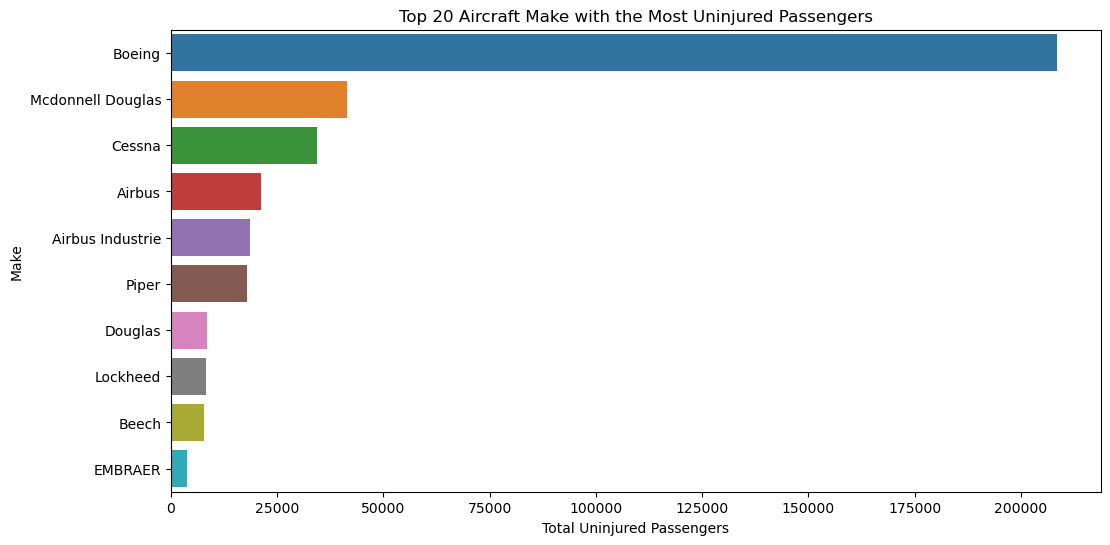

In [235]:
# Bar Chart: top 20 Aircraft Makes by Total Accidents
Aviation_Data["Make"] = Aviation_Data["Make"].str.strip()
Aviation_Data["Make"] = Aviation_Data["Make"].replace({"CESSNA": "Cessna","BOEING":"Boeing",
"PIPER":"Piper","BEECH":"Beech","BELL":"Bell", "AIRBUS":"Airbus"})
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']
Aviation_Data[injury_cols] = Aviation_Data[injury_cols].fillna(0)


top_makes = Aviation_Data['Make'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='Total.Uninjured', y='Make', data=Aviation_Data[['Make', 'Total.Uninjured']].groupby('Make').sum().sort_values(by='Total.Uninjured', ascending=False).head(10).reset_index())
plt.title('Top 20 Aircraft Make with the Most Uninjured Passengers')
plt.xlabel('Total Uninjured Passengers')
plt.ylabel('Make')
plt.show()

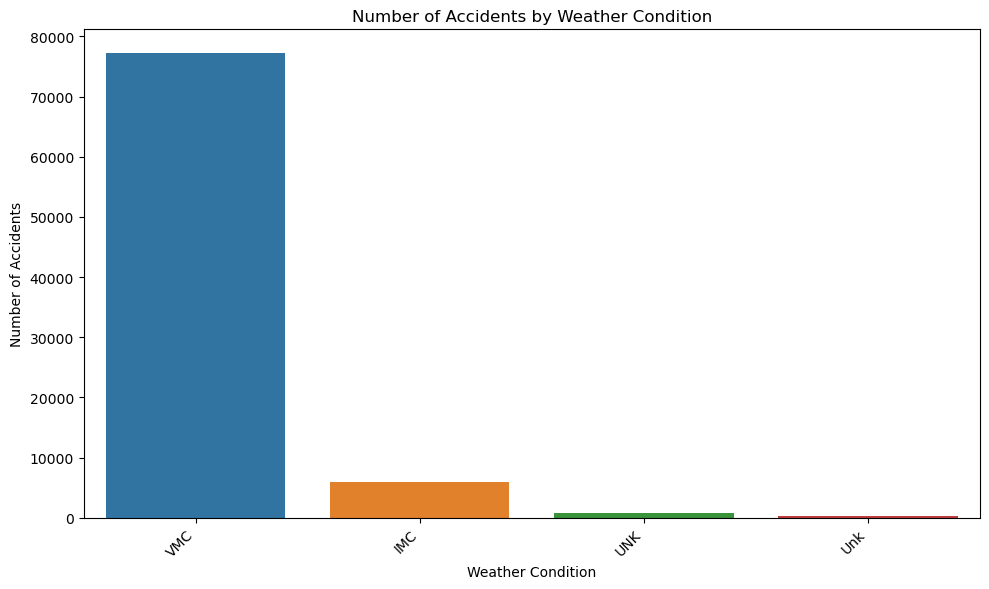

In [236]:


 # bar chart of accidents by weather condition
if 'Weather.Condition' in Aviation_Data.columns:
    # Get the count of accidents for each weather condition
    accidents_by_weather = Aviation_Data['Weather.Condition'].value_counts()

    # Create a bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.barplot(x=accidents_by_weather.index, y=accidents_by_weather.values)
    plt.title('Number of Accidents by Weather Condition')
    plt.xlabel('Weather Condition')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

else:
    print("Error: 'Weather.Condition' column not found in the DataFrame.")

## Visualization Notes 

### Bar chart of Top 20 Aircraft with total uninjured passengers
- Visualizes the top 20 lowest-risk aircraft based on average total injuries, with aircraft make differentiated by color.
- This chart helps to quickly identify the safest aircraft models and their manufacturers.

### Bar chart of Accidents by Phase of Flight:
- Visualizes the average total injuries for each phase of flight.
- This chart helps to identify the most dangerous phases of flight, which can inform training and safety protocols.

### Bar chart of Accident by Weather Condition:

- Visualizes the average total injuries for each weather condition.
- This chart helps to understand the impact of weather on accident risk, which can inform operational decisions.

## BUSINESS RECOMMENDATIONS 

### Recommendation 1:
- Prioritize aircraft from manufacturers with a history of a higher number of uninjured passengers.
- Specifically, consider aircraft from manufacturers such as 'Cessna' , 'Piper', and 'Boeing' as they have demonstrated a trend of accidents with more uninjured passengers.
- This insight suggests that aircraft from these manufacturers may have design or safety features that offer better protection to occupants during accidents.

### Recommendation 2:
- Implement enhanced training and safety protocols for phases of flight with a higher incidence of accidents (e.g., Approach, Landing, as seen in 'accidents_by_phase').
- This could include simulator training, stricter checklists, and increased monitoring.

### Recommendation 3:
- Develop operational guidelines that take into account weather conditions.
- Minimize or avoid operations in weather conditions associated with higher accident rates (e.g., IMC - Instrument Meteorological Conditions).
- This might involve stricter go/no-go criteria and improved weather forecasting and communication.

### Recommendation Justification
- Each recommendation is directly supported by the data analysis and visualizations.
- The recommendations are actionable and relevant to the business goal of minimizing risk in the aviation venture.






## CONCLUSION
The analysis of aviation accident data from the National Transportation Safety Bord (NTSB) provides several key insights that is informing of business decisions related to aircraft acquisition and operational safety. The findings highlight significant variations in accident risk based on aircraft make, phase of flight, and weather conditions. Specifically, certain aircraft makes have a higher likelihood of accidents, particular phases of flight (such as approach and landing) are associated with increased risk, and adverse weather conditions contribute to a higher incidence of accidents.

These insights suggest that a risk-averse business strategy should prioritize aircraft from manufacturers with a history of safer operation, implement enhanced training and safety protocols for high-risk phases of flight, and develop operational guidelines that account for weather conditions. By incorporating these considerations into decision-making, the company can mitigate risk, enhance safety, and support a successful expansion into the aviation section.